In [93]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [94]:
import pandas as pd
import numpy as np
import analytics
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

DATAPATH = 'analytics_data.csv'
OUTPUT_DIR = Path("plots")/"runtimes"
OUTPUT_TABLE = Path("plots")/"tables"
BASE_NAME = "suc_steps_"
plt.rcParams.update({
    "pgf.texsystem": "pdflatex",  # or xelatex/lualatex
    "font.family": "serif",
    "font.size": 30,
    "axes.titlesize":30,
    "axes.labelsize": 30,
    "text.usetex": True,
    "pgf.rcfonts": False,
})

In [95]:
df = pd.read_csv(DATAPATH)
METHOD_NAMES = df["method"].unique()
MAP_NAMES = df["map"].unique()
print("\nMETHODS")
print("\n".join(METHOD_NAMES.tolist()))
print("\nMAPS")
print("\n".join(MAP_NAMES.tolist()))    
display(df.head())

method_colors = {
    "Blend": ("#1f77b4", "-"),  # Blue, solid line
    "BlendManual30": ("#ff7f0e", "--"),  # Orange, dashed line
    "Rect": ("#2ca02c", "-"),  # Green, solid line
    "BlendManualTwoControl": ("#d62728", "-"),  # Red, dashed line
    "BlendUnlearn": ("#9467bd", "-."),  # Purple, dash-dot line
    "Cable30": ("#8c564b", "-"),  # Brown, solid line
    "Cable": ("#7f7f7f", "--"),  # Gray, dashed line
    "RadiusDummy": ("#17becf", "-"),  # Cyan, solid line
    "ManualBlend": ("#bcbd22", "-"),  # Olive, solid line
    "DodgeReduction": ("#e377c2", "--"),  # Magenta, dashed line
    "OneControl": ("#2b6f9c", "-."),  # Darker Blue, dash-dot line
    "DodgeRRT": ("#ff9896", "--"),  # Light Red, dashed line
    "FiveControl": ("#118c4f", "-"),  # Forest Green, solid line
    "BlendManualOneControl": ("#8a2be2", "-."),  # Blue Violet, dash-dot line
    "TwoControl": ("#a0522d", "--"),  # Sienna Brown, dashed line
    "BlendManual20": ("#4682b4", "-"),  # Steel Blue, solid line
    "Cable20": ("#556b2f", "--"),  # Dark Olive Green, dashed line
    "BlendManualFiveControl": ("#000000", "-"), # Black, solid line
    "RadiusRL": ("#b22222", "-."),  # Firebrick Red, solid line
}
# method_colors = {
#     "Blend": "#1f77b4",  # Blue
#     "BlendManual30": "#ff7f0e",  # Orange
#     "Rect": "#2ca02c",  # Green
#     "BlendManualTwoControl": "#d62728",  # Red
#     "BlendUnlearn": "#9467bd",  # Purple
#     "Cable30": "#8c564b",  # Brown
#     "Cable": "#7f7f7f",  # Gray
#     "RadiusDummy": "#17becf",  # Cyan
#     "ManualBlend": "#bcbd22",  # Olive
#     "DodgeReduction": "#e377c2",  # Magenta
#     "OneControl": "#2b6f9c",  # Darker Blue
#     "DodgeRRT": "#ff9896",  # Light Red
#     "FiveControl": "#118c4f",  # Forest Green
#     "BlendManualOneControl": "#8a2be2",  # Blue Violet
#     "TwoControl": "#a0522d",  # Sienna Brown
#     "BlendManual20": "#4682b4",  # Steel Blue
#     "Cable20": "#556b2f",  # Dark Olive Green
#     "BlendManualFiveControl": "#708090",  # Slate Gray
#     "RadiusRL": "#b22222",  # Firebrick Red
# }


METHODS
Blend
BlendManual30
Rect
BlendManualTwoControl
BlendUnlearn
Cable30
Cable
RadiusDummy
ManualBlend
DodgeReduction
OneControl
DodgeRRT
FiveControl
BlendManualOneControl
TwoControl
BlendManual20
Cable20
BlendManualFiveControl
RadiusRL

MAPS
NonConvex
StandardStones
ThickStones
Piped


,tot_time,method,run,map,iterations,finished,collided_cnt,timeout_cnt,reached_cnt,steps_sum,sim_time,storage_time,node_cnt,path_node_cnt,env_export_t,env_import_t,env_render_t,env_reset_t,env_step_t
0,76.809775,Blend,run_22,NonConvex,443,True,372,0,71,50363,4.218115,0.520429,2391,108,10.691263,0.353535,0.333861,0.121566,47.467087
1,228.439006,Blend,run_25,NonConvex,1465,True,1239,0,226,146260,12.047055,1.995463,6873,127,32.353750,1.174764,0.972852,0.394478,140.193101
2,492.110171,Blend,run_28,NonConvex,4362,True,3799,0,563,342023,23.501923,15.304835,15986,245,64.520681,3.910512,2.171260,1.078162,292.474195
3,60.572312,Blend,run_8,NonConvex,506,True,440,0,66,41406,3.688477,0.473699,1929,76,8.473644,0.374374,0.277923,0.128410,37.016734
4,90.425734,Blend,run_5,NonConvex,476,True,388,0,88,62546,4.804047,0.629604,3004,113,12.437832,0.353308,0.416383,0.120424,55.219508


In [96]:
print(METHOD_NAMES)
WANTED_METHODS = ['Blend', 'Rect',  'BlendUnlearn',
 'Cable', 'RadiusDummy', 'BlendManual', 'DodgeReduction',
  'DodgeRRT', 'RadiusRL']

MORE_METHODS= ['BlendManual30', 'BlendManualTwoControl',
 'Cable30' , 
 'OneControl'  'FiveControl' 'BlendManualOneControl'
 'TwoControl' 'BlendManual20' 'Cable20' 'BlendManualFiveControl']

MORE_SEG_METHODS = ['BlendManual30','Cable30','Cable',"BlendManual",'BlendManual20', 'Cable20']
LESS_CTRL_METHODS = ['BlendManualTwoControl', 'OneControl', 'FiveControl', 'BlendManualOneControl', 'TwoControl', 'BlendManualFiveControl',"Cable","BlendManual"]


['Blend' 'BlendManual30' 'Rect' 'BlendManualTwoControl' 'BlendUnlearn'
 'Cable30' 'Cable' 'RadiusDummy' 'ManualBlend' 'DodgeReduction'
 'OneControl' 'DodgeRRT' 'FiveControl' 'BlendManualOneControl'
 'TwoControl' 'BlendManual20' 'Cable20' 'BlendManualFiveControl'
 'RadiusRL']


In [97]:
# Rename 'ManualBlend' to 'BlendManual' in the dataframe
df.loc[df['method'] == 'ManualBlend', 'method'] = 'BlendManual'

# Update method_colors dictionary
method_colors['BlendManual'] = method_colors.pop('ManualBlend')

# Update the method names in relevant lists
WANTED_METHODS = [method if method != 'ManualBlend' else 'BlendManual' for method in WANTED_METHODS]
MORE_SEG_METHODS = [method if method != 'ManualBlend' else 'BlendManual' for method in MORE_SEG_METHODS]
LESS_CTRL_METHODS = [method if method != 'ManualBlend' else 'BlendManual' for method in LESS_CTRL_METHODS]

# Print confirmation
print("Method name 'ManualBlend' has been renamed to 'BlendManual'")
print(f"Updated WANTED_METHODS: {WANTED_METHODS}")

Method name 'ManualBlend' has been renamed to 'BlendManual'
Updated WANTED_METHODS: ['Blend', 'Rect', 'BlendUnlearn', 'Cable', 'RadiusDummy', 'BlendManual', 'DodgeReduction', 'DodgeRRT', 'RadiusRL']


In [98]:
df[df["method"]=="BlendManual"]

,tot_time,method,run,map,iterations,finished,collided_cnt,timeout_cnt,reached_cnt,steps_sum,sim_time,storage_time,node_cnt,path_node_cnt,env_export_t,env_import_t,env_render_t,env_reset_t,env_step_t
233,60.895877,BlendManual,run_22,NonConvex,791,True,705,0,86,61738,5.756079,0.765319,2839,175,11.094553,0.553192,0.321682,0.128880,43.958887
234,58.821875,BlendManual,run_25,NonConvex,668,True,580,0,88,55517,5.673893,0.668200,2621,139,11.044647,0.501725,0.304469,0.118040,42.383905
235,103.781171,BlendManual,run_28,NonConvex,987,True,852,0,135,87244,9.977711,2.570323,4098,123,17.797446,0.760802,0.473155,0.191246,75.377318
236,51.347740,BlendManual,run_8,NonConvex,723,True,613,0,110,48881,4.515640,0.938476,2308,102,9.915151,0.575908,0.270656,0.128566,36.108696
237,27.120962,BlendManual,run_5,NonConvex,270,True,234,0,36,25210,2.645212,0.228173,1177,131,5.480407,0.212939,0.144661,0.048665,19.271849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1932,45.424202,BlendManual,run_20,Piped,833,True,775,0,58,45345,4.829919,0.636285,1998,146,6.547309,0.537321,0.244899,0.141162,34.132059
1933,52.840354,BlendManual,run_12,Piped,988,True,903,0,85,48197,4.930578,1.615823,2241,79,8.597475,0.651319,0.271582,0.173221,38.004603
1934,12.088161,BlendManual,run_19,Piped,151,True,138,0,13,12778,1.227462,0.055411,595,83,1.998702,0.091817,0.067837,0.024353,9.031031
1935,38.812058,BlendManual,run_4,Piped,685,True,624,0,61,40027,3.661235,0.845638,1870,65,6.281390,0.405719,0.204728,0.110103,28.271969


In [99]:

# for m in df["map"].unique():
#     print(f"Map: {m}")
#     success_rates = df[df["map"] == m].groupby("method")["finished"].mean().sort_values(ascending=False)
#     display(success_rates.to_frame())
success_rates = df.groupby(["method", "map"])["finished"].mean().sort_values(ascending=False)
success_rates = success_rates.unstack()
success_rates = success_rates.loc[WANTED_METHODS]

display(success_rates)
success_rates.to_latex(OUTPUT_TABLE/"success_rates_v2.tex", float_format="%.2f", escape=False)


map,NonConvex,Piped,StandardStones,ThickStones
method,,,,
Blend,1.000000,0.666667,1.000000,0.866667
Rect,1.000000,1.000000,1.000000,1.000000
BlendUnlearn,1.000000,0.700000,1.000000,0.966667
Cable,0.966667,0.100000,1.000000,0.033333
RadiusDummy,1.000000,0.000000,1.000000,0.000000
BlendManual,1.000000,1.000000,1.000000,1.000000
DodgeReduction,0.133333,0.000000,0.633333,0.000000
DodgeRRT,0.000000,0.000000,0.000000,0.000000
RadiusRL,0.000000,0.000000,0.000000,0.000000


In [100]:
#TODO display also average node count, iterations
# In text just for StandardStones or Cumulative from all maps... for the rest in Appendix
# or small tables per approach


print("All")
modified_df = df[df["method"].isin(METHOD_NAMES)]
view_table = analytics.create_viewTable(modified_df)
view_table[view_table.select_dtypes(include=['number']).columns] = view_table.select_dtypes(include=['number']).round(2)
display(view_table)
view_table.to_latex(OUTPUT_TABLE/"all_methods_v2.tex",float_format="%.2f")

for m in MAP_NAMES:
    print(m)
    map_modified_df = modified_df[modified_df["map"] == m]
    view_table = analytics.create_viewTable(map_modified_df)
    view_table[view_table.select_dtypes(include=['number']).columns] = view_table.select_dtypes(include=['number']).round(2)
    display(view_table)
    view_table.to_latex(OUTPUT_TABLE/f"analytics_{m}_v2.tex",float_format="%.2f")





# for m in df["method"].unique():
#     view_table[m] = df[df["method"] == m].groupby("map")["finished"].mean().sort_values(ascending=False)

All


,Success Rate,Mean Time (s),Mean Time FO (s),Mean Node Count,Mean Node Count FO,Mean Iterations,Mean Iterations FO
method,,,,,,,
Blend,0.88,237.47,190.58,7399.34,5986.33,2761.02,2013.11
BlendManual20,1.00,40.47,40.47,1210.88,1210.88,207.53,207.53
BlendManual30,1.00,49.96,49.96,1100.08,1100.08,128.00,128.00
BlendManualFiveControl,1.00,67.11,67.11,3323.32,3323.32,891.59,891.59
BlendManualOneControl,0.52,231.97,66.69,10012.00,3385.49,10406.81,1858.97
BlendManualTwoControl,0.53,236.94,122.04,10866.21,6164.03,7723.09,2256.89
BlendUnlearn,0.92,166.85,129.59,5587.50,4364.04,1002.58,714.94
Cable,0.52,291.01,135.28,7089.97,4616.43,32340.10,11961.22
Cable20,0.55,346.48,182.52,6988.55,4880.36,33072.77,13949.36


NonConvex


,Success Rate,Mean Time (s),Mean Time FO (s),Mean Node Count,Mean Node Count FO,Mean Iterations,Mean Iterations FO
method,,,,,,,
Blend,1.00,211.35,211.35,6850.43,6850.43,1421.87,1421.87
BlendManual20,1.00,93.17,93.17,2795.07,2795.07,430.63,430.63
BlendManual30,1.00,123.21,123.21,2726.07,2726.07,314.17,314.17
BlendManualFiveControl,1.00,88.99,88.99,4432.53,4432.53,714.03,714.03
BlendManualOneControl,1.00,59.54,59.54,3031.63,3031.63,1515.30,1515.30
BlendManualTwoControl,0.93,174.45,158.61,8641.33,7933.71,3165.53,2808.71
BlendUnlearn,1.00,130.58,130.58,4362.47,4362.47,454.73,454.73
Cable,0.97,156.31,143.95,5345.30,5100.14,12502.07,11648.62
Cable20,0.97,197.45,186.63,5593.17,5331.76,13253.23,12559.31


StandardStones


,Success Rate,Mean Time (s),Mean Time FO (s),Mean Node Count,Mean Node Count FO,Mean Iterations,Mean Iterations FO
method,,,,,,,
Blend,1.00,104.95,104.95,3231.70,3231.70,799.23,799.23
BlendManual20,1.00,15.24,15.24,460.43,460.43,58.63,58.63
BlendManual30,1.00,19.93,19.93,440.87,440.87,38.73,38.73
BlendManualFiveControl,1.00,29.42,29.42,1458.53,1458.53,209.27,209.27
BlendManualOneControl,1.00,53.72,53.72,2861.00,2861.00,1161.50,1161.50
BlendManualTwoControl,0.97,107.16,97.62,5445.23,5003.38,1801.97,1629.34
BlendUnlearn,1.00,42.25,42.25,1412.83,1412.83,155.93,155.93
Cable,1.00,112.02,112.02,3983.73,3983.73,9974.07,9974.07
Cable20,1.00,152.70,152.70,4227.90,4227.90,11329.87,11329.87


ThickStones


,Success Rate,Mean Time (s),Mean Time FO (s),Mean Node Count,Mean Node Count FO,Mean Iterations,Mean Iterations FO
method,,,,,,,
Blend,0.87,249.78,198.62,7848.33,6289.15,3703.00,2889.42
BlendManual20,1.00,18.28,18.28,554.83,554.83,102.17,102.17
BlendManual30,1.00,24.90,24.90,549.70,549.70,62.83,62.83
BlendManualFiveControl,1.00,74.75,74.75,3759.30,3759.30,1378.90,1378.90
BlendManualOneControl,0.07,397.88,278.84,16957.23,12839.00,18069.73,13378.00
BlendManualTwoControl,0.17,316.28,96.54,14033.33,4845.80,13189.73,3444.40
BlendUnlearn,0.97,149.98,136.79,5157.37,4691.07,980.00,864.79
Cable,0.03,441.51,467.33,9609.30,9662.00,54774.90,49169.00
Cable20,0.17,488.43,246.82,8418.20,4921.40,50816.60,25752.60


Piped


,Success Rate,Mean Time (s),Mean Time FO (s),Mean Node Count,Mean Node Count FO,Mean Iterations,Mean Iterations FO
method,,,,,,,
Blend,0.67,383.80,277.42,11666.90,8428.45,5119.97,3581.60
BlendManual20,1.00,35.18,35.18,1033.17,1033.17,238.70,238.70
BlendManual30,1.00,31.80,31.80,683.67,683.67,96.27,96.27
BlendManualFiveControl,1.00,75.26,75.26,3642.90,3642.90,1264.17,1264.17
BlendManualOneControl,0.03,416.73,246.45,17198.13,10829.00,20880.70,10055.00
BlendManualTwoControl,0.07,349.86,28.06,15344.93,1513.50,12735.13,662.00
BlendUnlearn,0.70,344.58,242.99,11417.33,8130.67,2419.67,1678.29
Cable,0.10,454.21,173.31,9421.53,4585.67,52109.37,22452.00
Cable20,0.07,547.34,409.42,9714.93,8019.50,56891.37,43889.50


# Head2Head comparision

Cable vs Rect

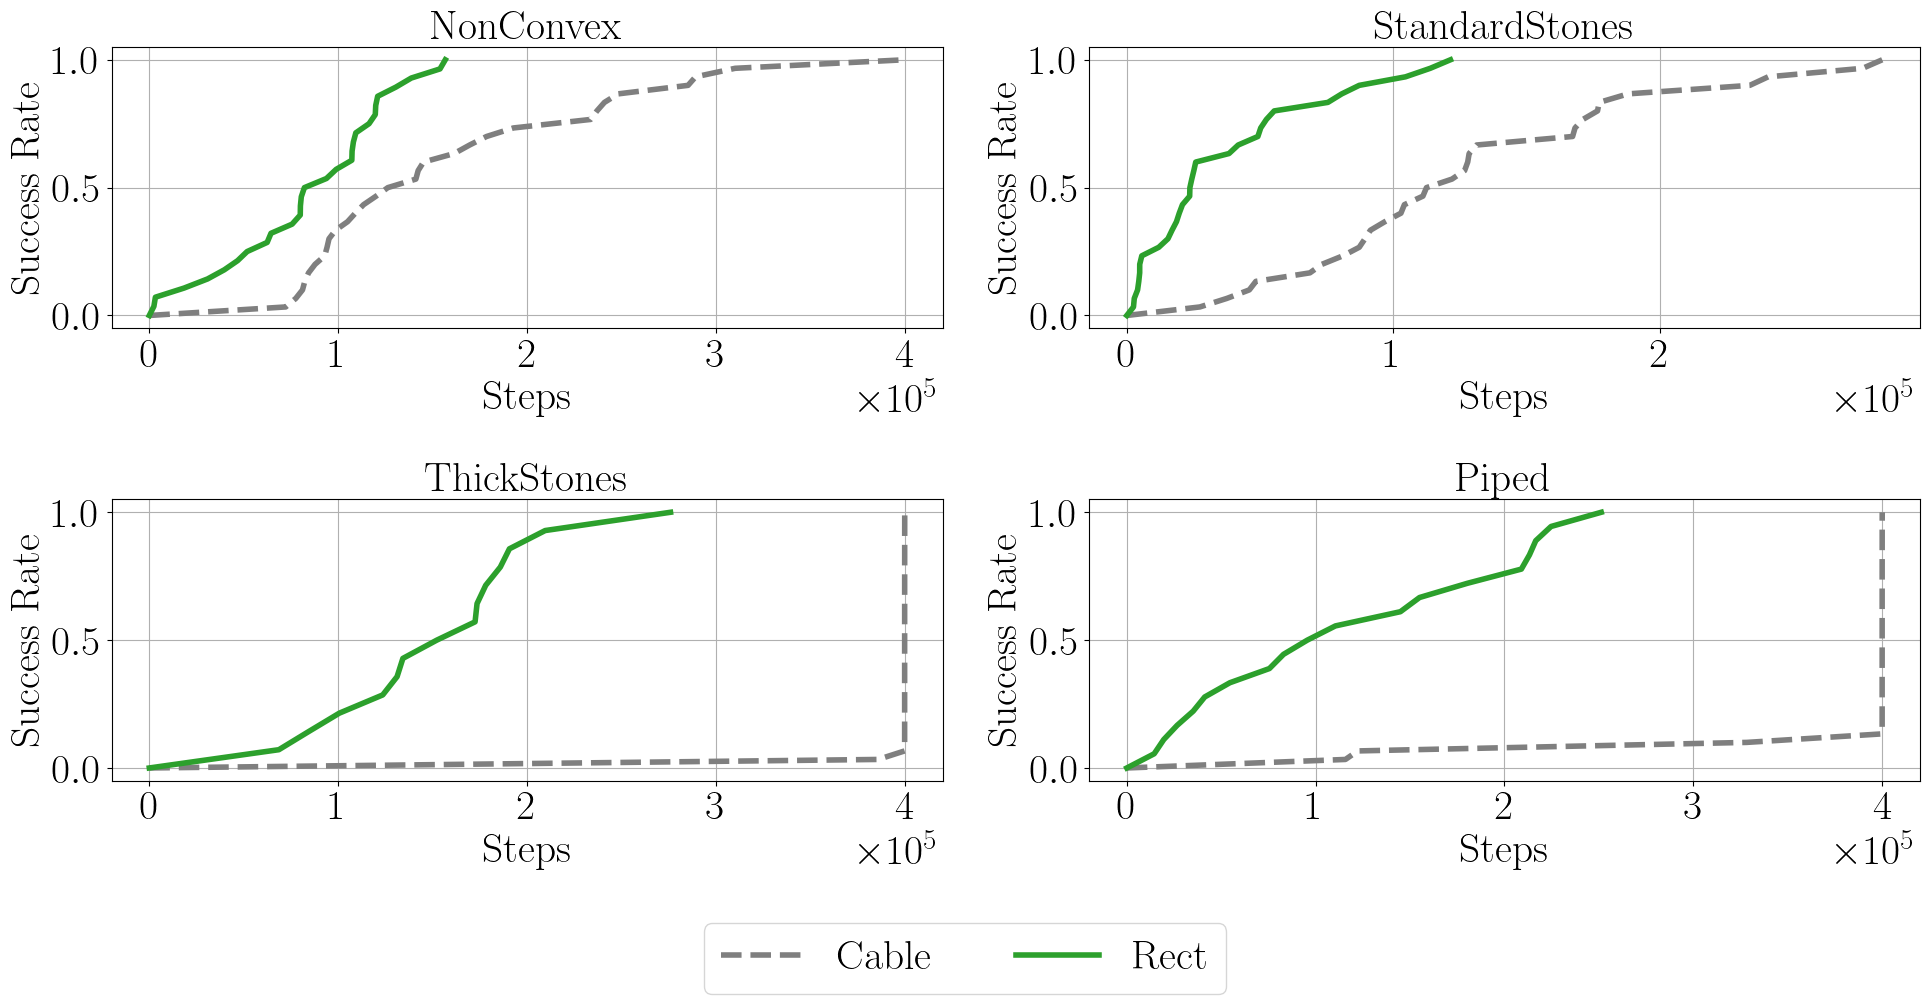

In [101]:
measured_methods = ["Cable", "Rect"]
fig =analytics.plot_cum_success_against_steps_all(df,measured_methods, MAP_NAMES,color_dict=method_colors)
fig.savefig(OUTPUT_DIR/(BASE_NAME+"cable_rect.pdf"), bbox_inches="tight")

RadiusRL vs RadiusDummy

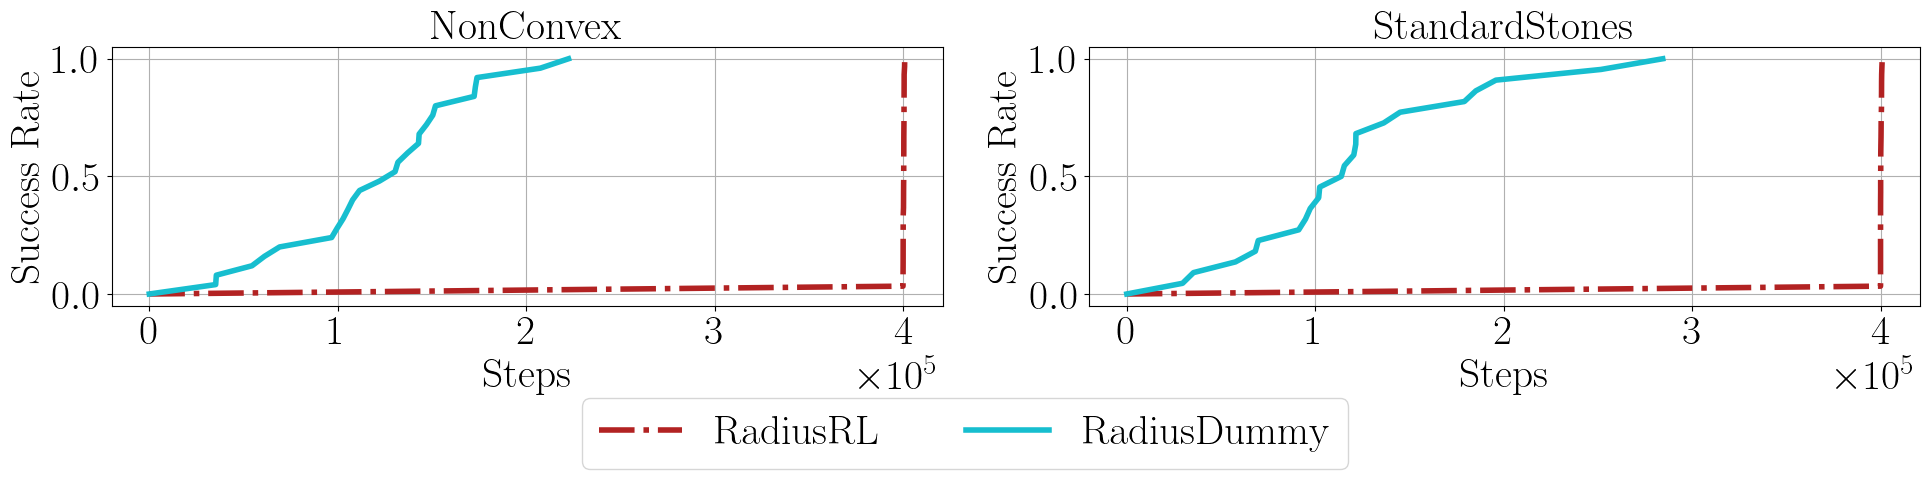

In [102]:
measured_methods = ["RadiusRL", "RadiusDummy"]
maps = ["NonConvex", "StandardStones"]
fig =analytics.plot_cum_success_against_steps_all(df,measured_methods, maps,color_dict=method_colors)
fig.savefig(OUTPUT_DIR/(BASE_NAME+"Radius.pdf"), bbox_inches="tight")

Blend vs BlendUnlearn vs BlendManual

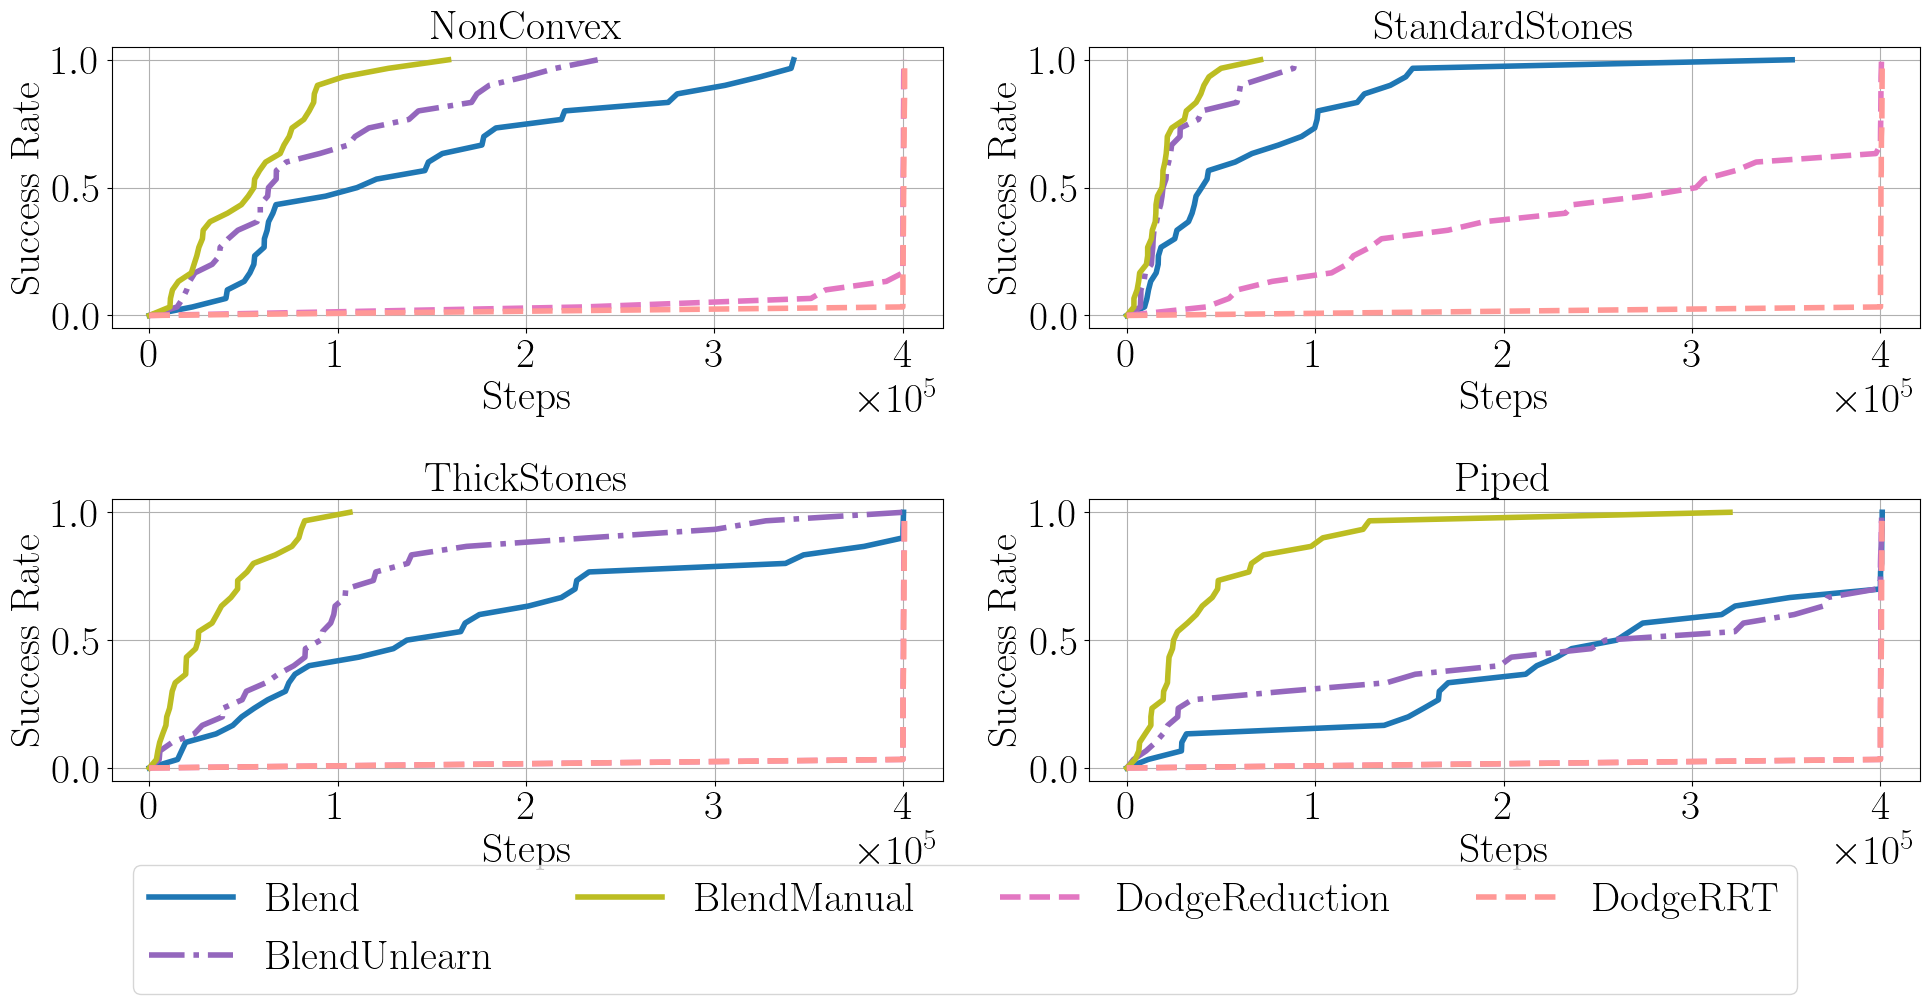

In [103]:
measured_methods = ["Blend", "BlendUnlearn", "BlendManual","DodgeReduction", "DodgeRRT"]
fig =analytics.plot_cum_success_against_steps_all(df,measured_methods, MAP_NAMES,color_dict=method_colors)
fig.savefig(OUTPUT_DIR/(BASE_NAME+"Blend.pdf"), bbox_inches="tight")


Dodge vs DodgeRRT

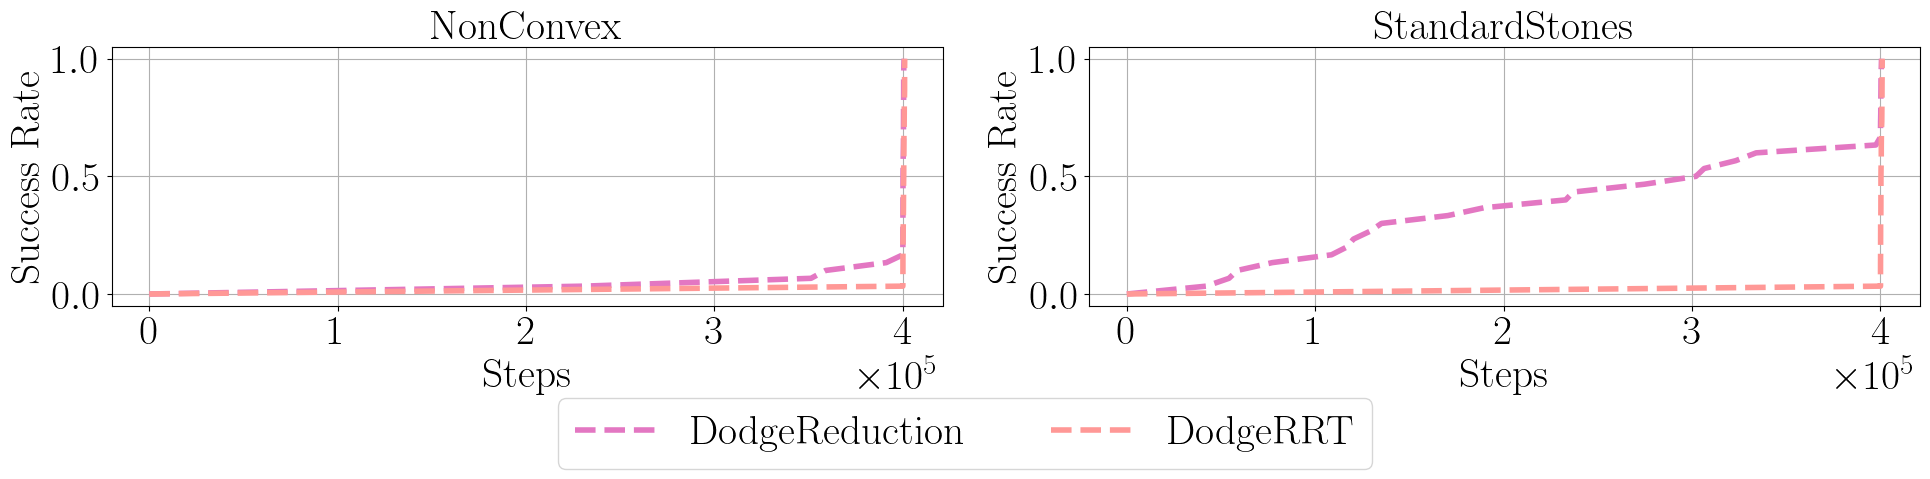

In [104]:
measured_methods = ["DodgeReduction", "DodgeRRT"]
fig =analytics.plot_cum_success_against_steps_all(df,measured_methods, ["NonConvex", "StandardStones"],color_dict=method_colors)
fig.savefig(OUTPUT_DIR/(BASE_NAME+"Dodge.pdf"), bbox_inches="tight")


BEST

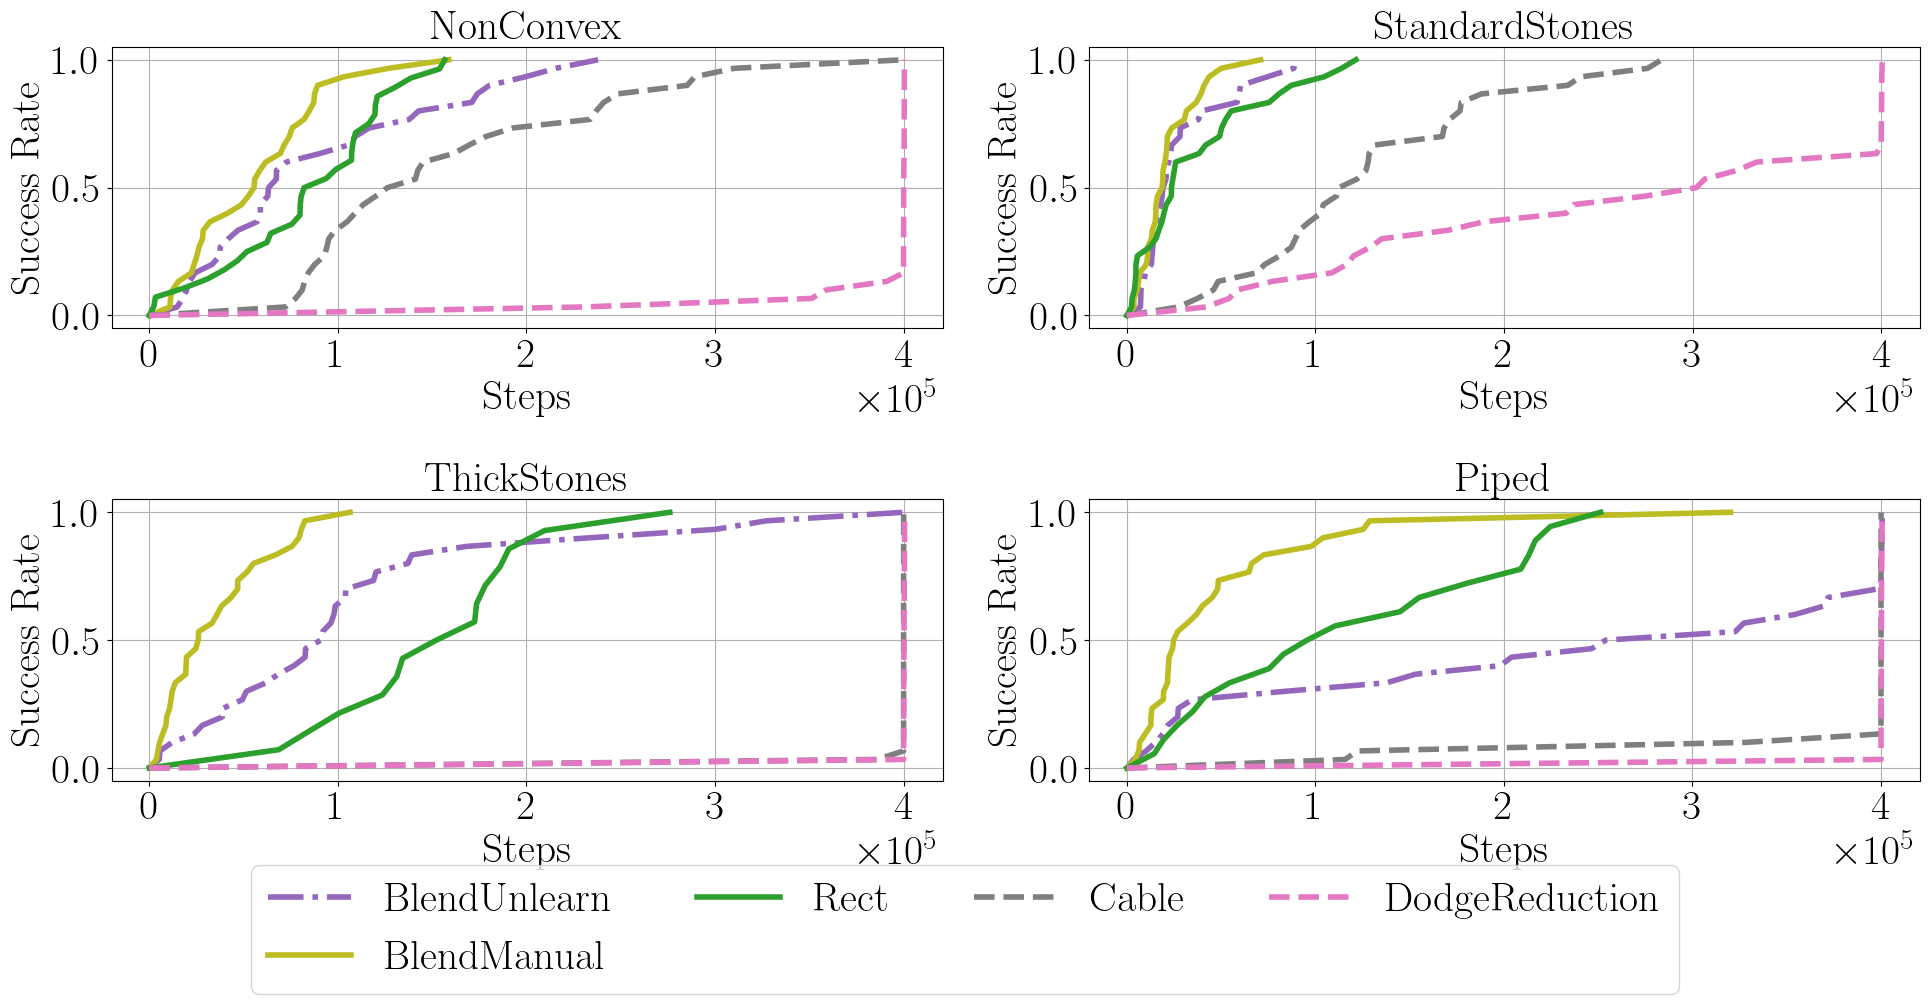

In [105]:
measured_methods = ["BlendUnlearn", "BlendManual","Rect","Cable","DodgeReduction"]
fig = analytics.plot_cum_success_against_steps_all(df,measured_methods, MAP_NAMES,color_dict=method_colors)
fig.savefig(OUTPUT_DIR/(BASE_NAME+"best.pdf"), bbox_inches="tight")


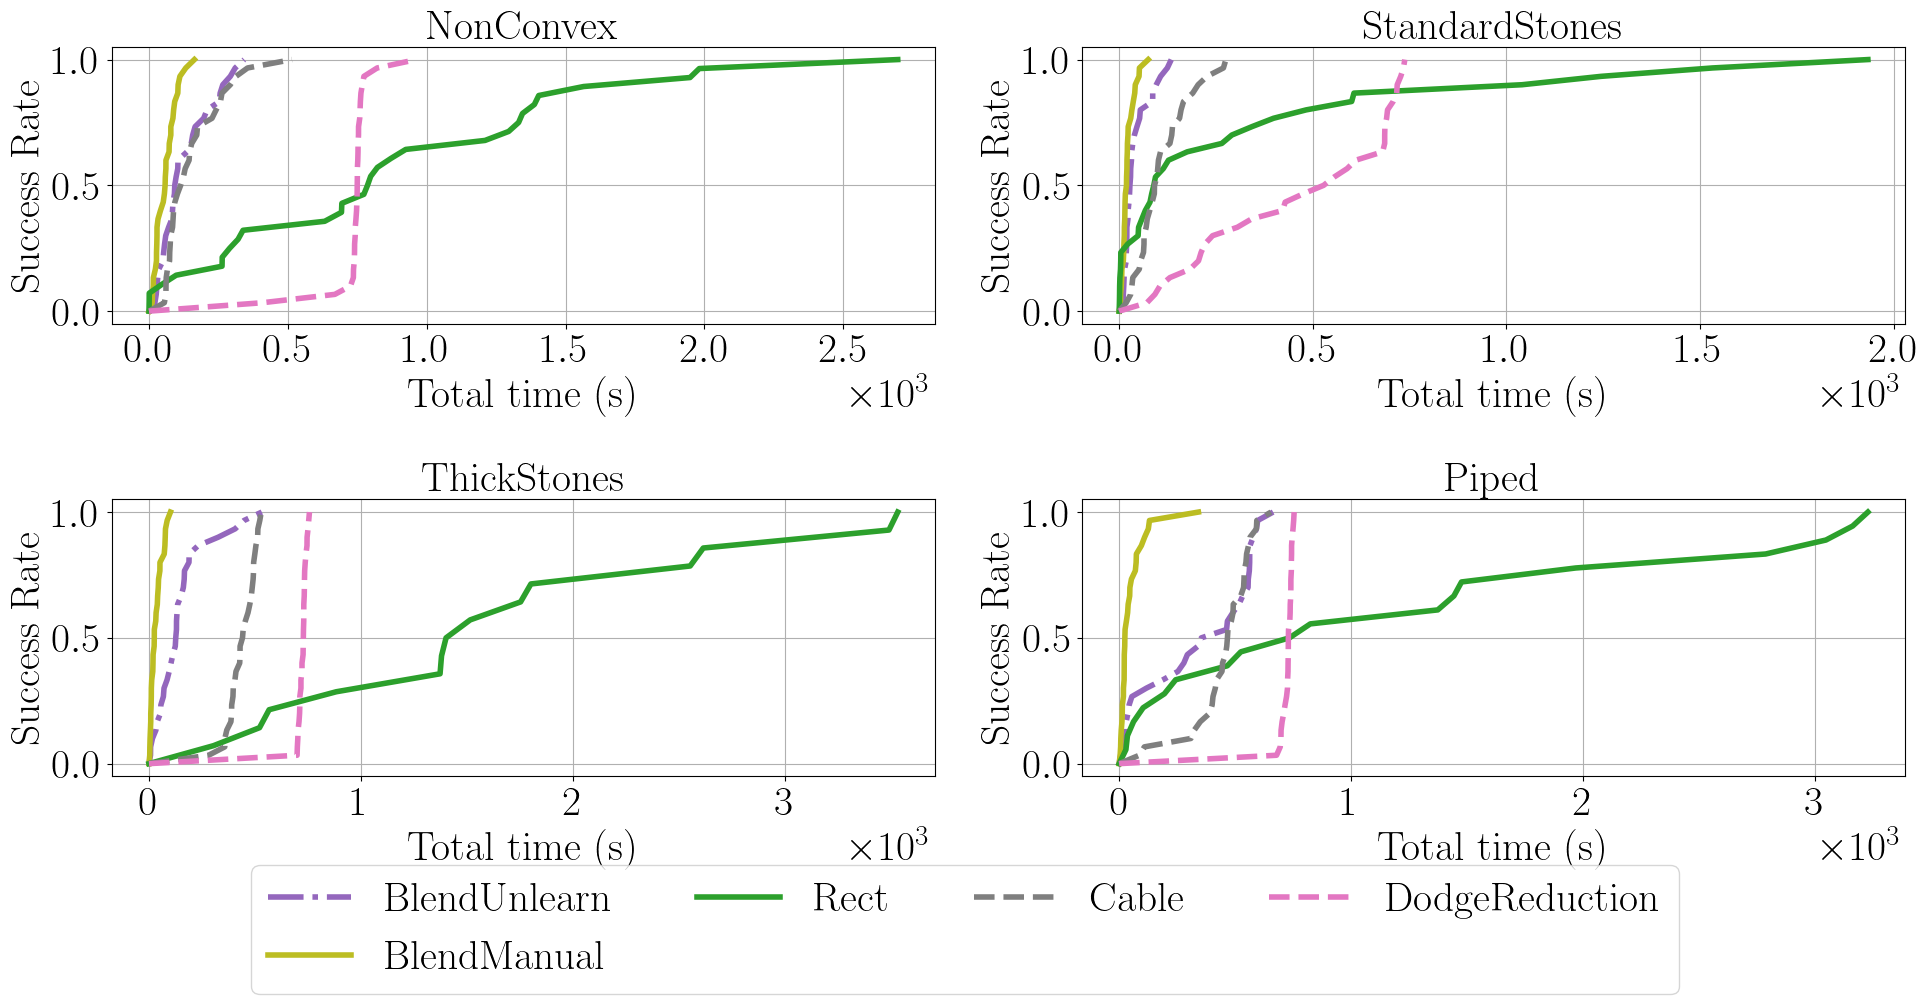

In [106]:
#Best in time
measured_methods = ["BlendUnlearn", "BlendManual","Rect","Cable","DodgeReduction"]
fig = analytics.plot_cum_success_against_x_all(df,measured_methods,"tot_time", MAP_NAMES,"Total time (s)",color_dict=method_colors)
fig.savefig(OUTPUT_DIR/(BASE_NAME+"best_time.pdf"), bbox_inches="tight")

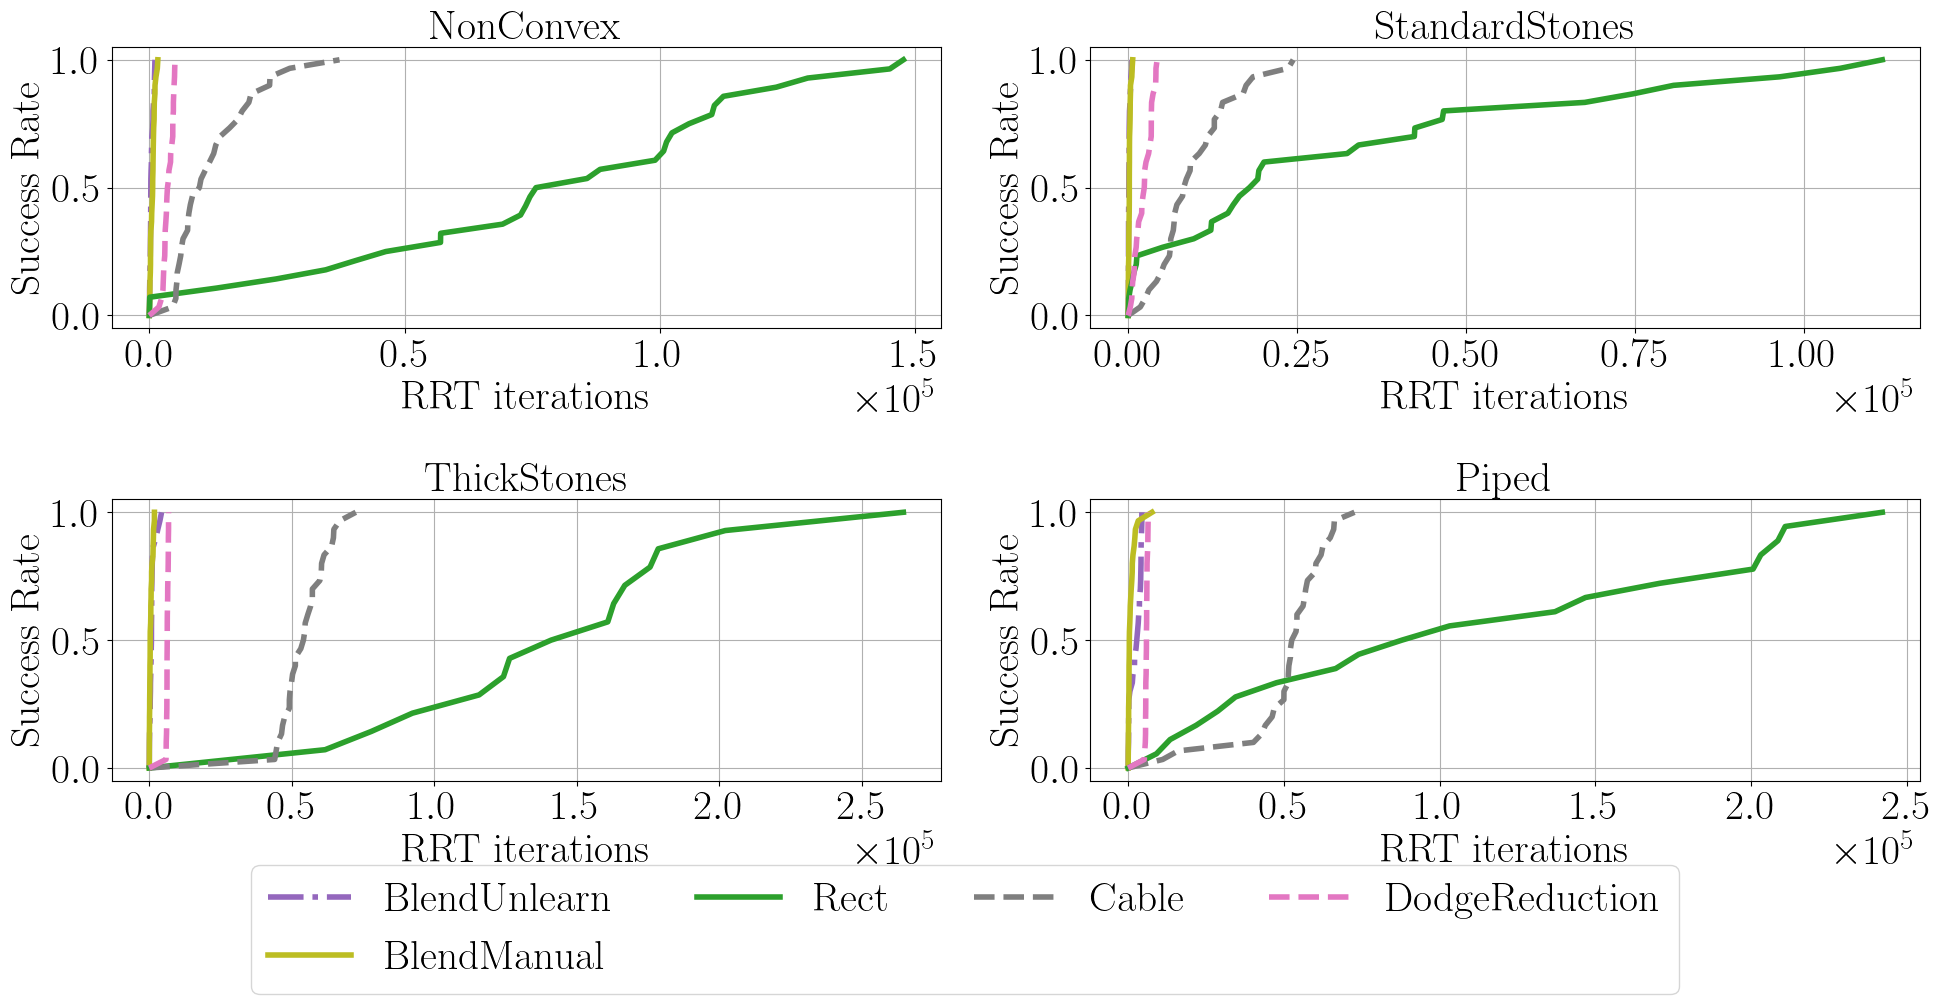

In [107]:
#Best in iter
measured_methods = ["BlendUnlearn", "BlendManual","Rect","Cable","DodgeReduction"]
fig = analytics.plot_cum_success_against_x_all(df,measured_methods,"iterations", MAP_NAMES,"RRT iterations",color_dict=method_colors)
fig.savefig(OUTPUT_DIR/(BASE_NAME+"rrt_iter.pdf"), bbox_inches="tight")

In [108]:
#TODO runtime env analysis of the best

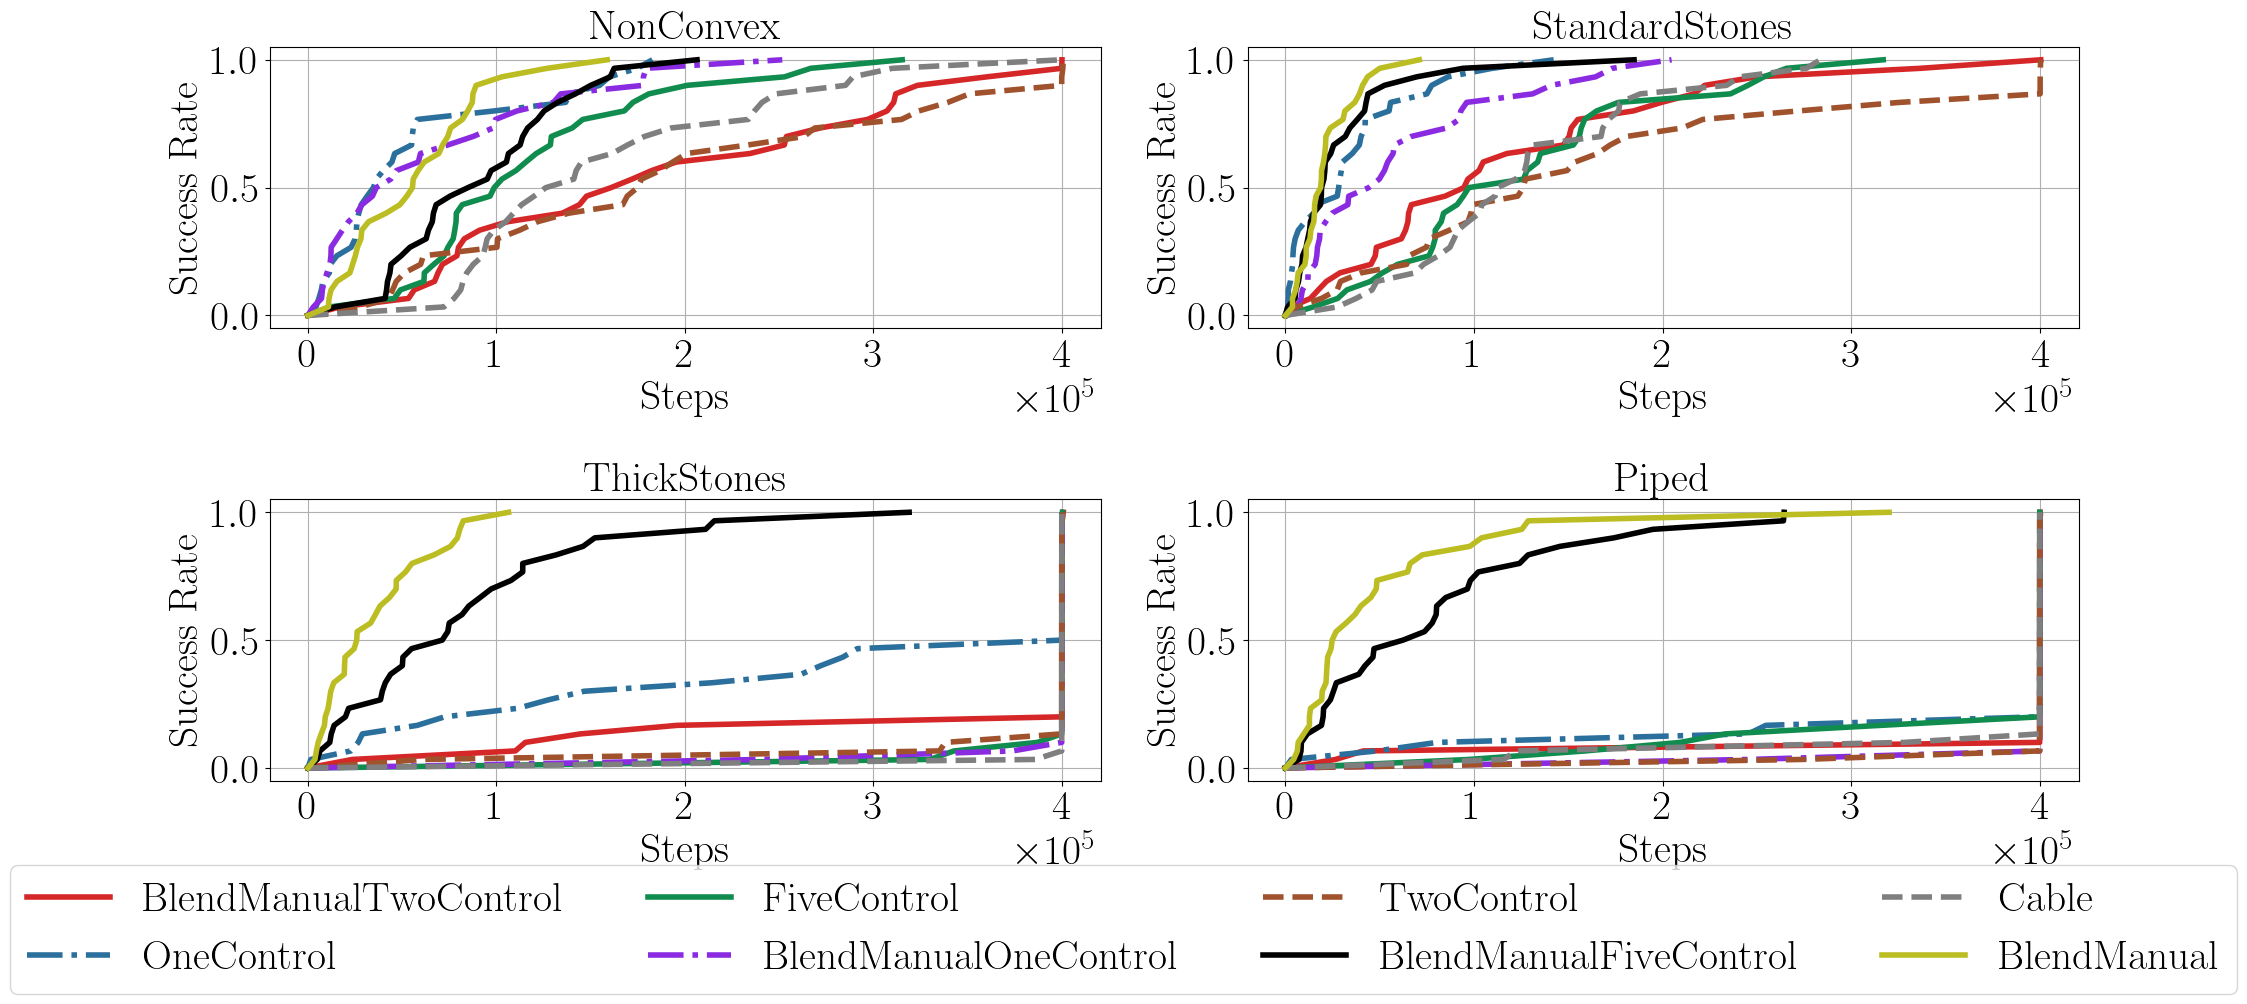

In [109]:
measured_methods = LESS_CTRL_METHODS
fig = analytics.plot_cum_success_against_steps_all(df,measured_methods, MAP_NAMES,color_dict=method_colors)
fig.savefig(OUTPUT_DIR/(BASE_NAME+"less_control.pdf"), bbox_inches="tight")

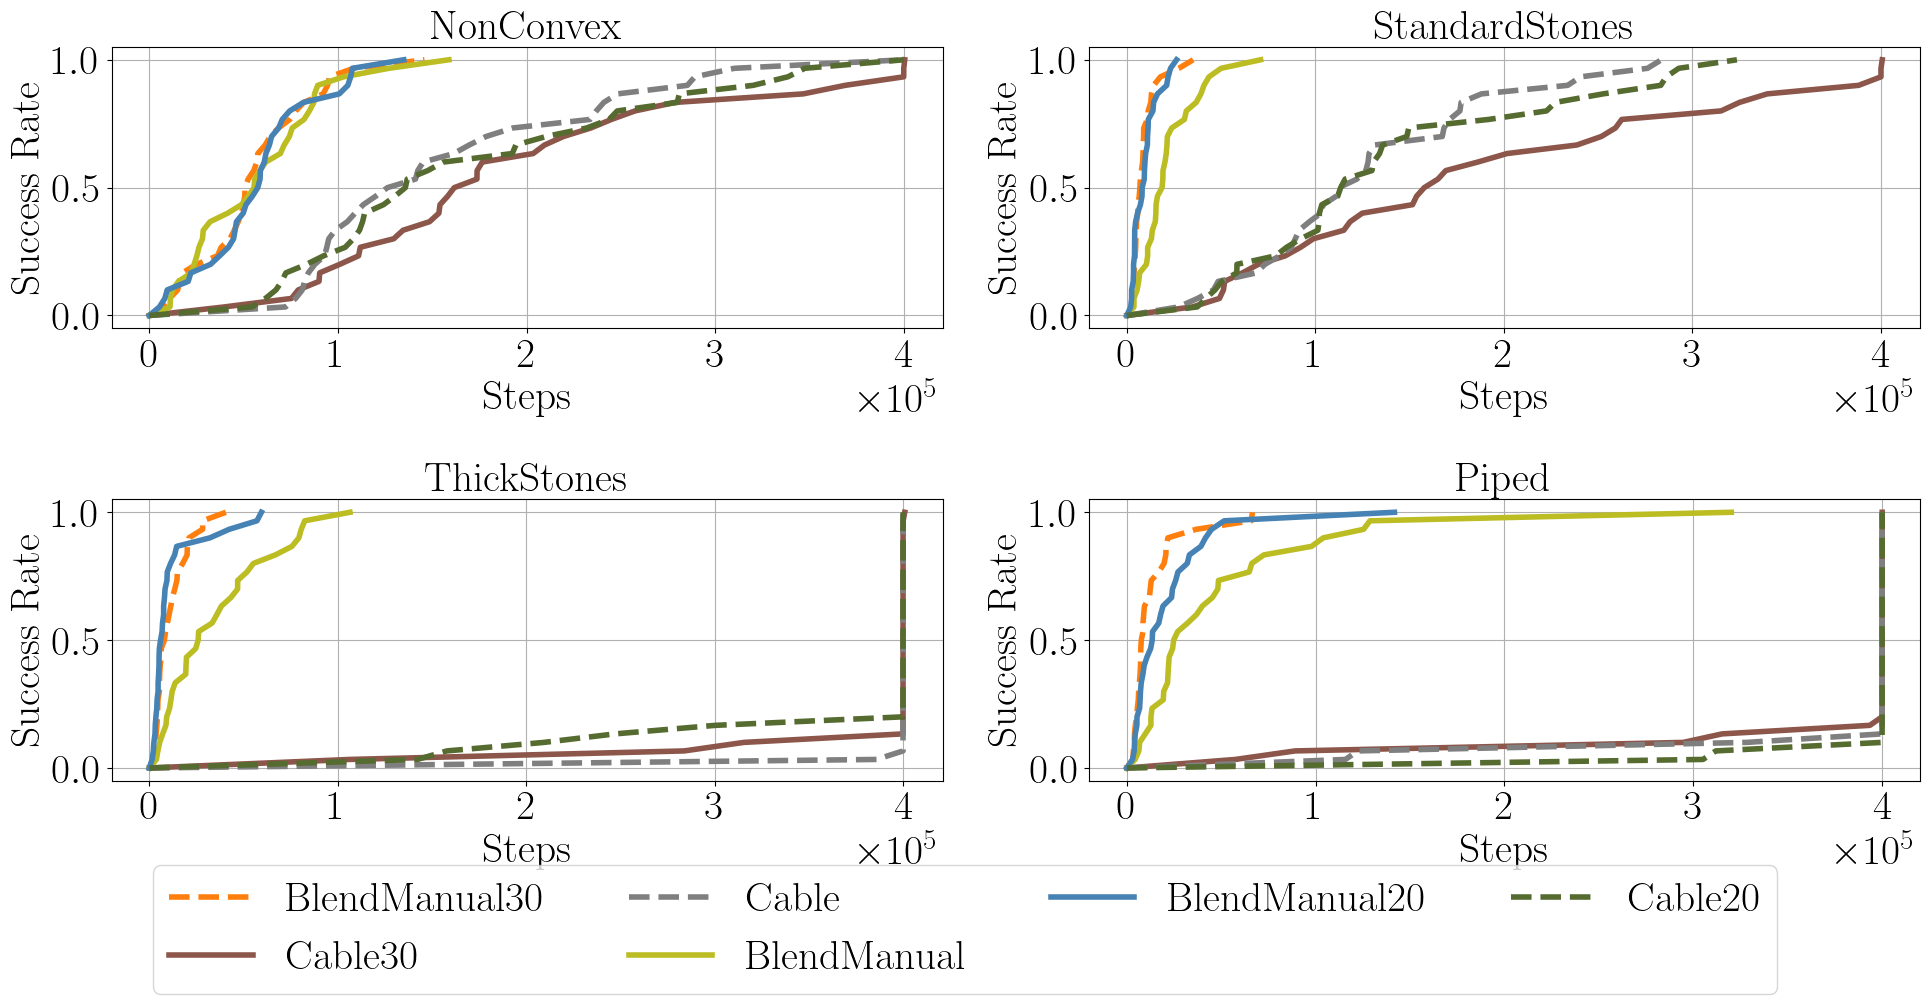

In [110]:
measured_methods = MORE_SEG_METHODS
fig = analytics.plot_cum_success_against_steps_all(df,measured_methods, MAP_NAMES,color_dict=method_colors)
fig.savefig(OUTPUT_DIR/(BASE_NAME+"more_segments.pdf"), bbox_inches="tight")
# fig = analytics.plot_cum_success_against_x_all(df,measured_methods, "tot_time",MAP_NAMES,color_dict=method_colors)